# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import fourier_filter

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Optical constraints

In [3]:
n1 = 1.465
n2 = 1.45
NA = np.sqrt(np.square(n1) - np.square(n2))
alpha = np.arcsin(NA)
wavelength = 1064e-9

# Filtering

In [7]:
x = np.linspace(-10, 10, 128)*1e-6
X, Y = np.meshgrid(x, x)
R = np.sqrt(np.square(X) + np.square(Y))
sigma = 1e-6
x0 = np.exp(-np.square(R/sigma))
step = x[1] - x[0]

xfi_np, xf_np = fourier_filter.numpy_fourier_lowpass_filter(x0, 0.3)
xfi_tr, xf_tr = fourier_filter.torch_fourier_lowpass_filter(x0, 0.3)

xfin_np, xfn_np = fourier_filter.numpy_NA_filter(x0, NA, wavelength, step)
xfin_tr, xfn_tr = fourier_filter.torch_NA_filter(x0, NA, wavelength, step)

# Comparaisons

Text(0.5, 1.0, '$|x_1|$ (PyTorch - Numpy)')

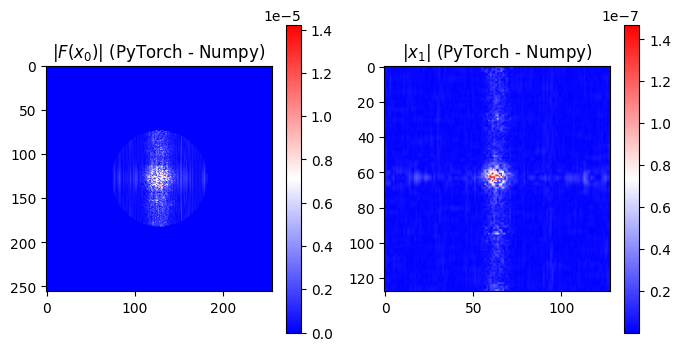

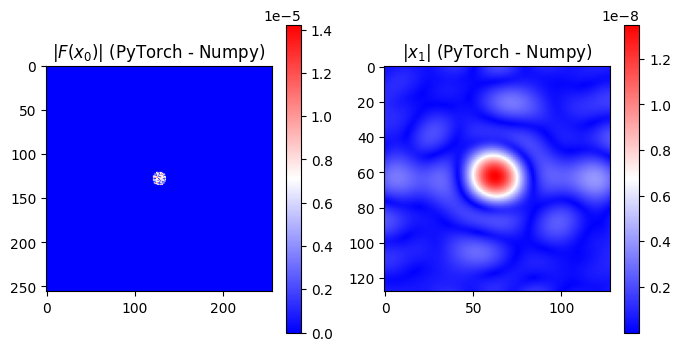

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
pl0 = axs[0].imshow(np.abs(xf_tr - xf_np), cmap='bwr')
pl1 = axs[1].imshow(np.abs(xfi_tr - xfi_np), cmap='bwr')
plt.colorbar(pl0)
plt.colorbar(pl1)

axs[0].set_title(r'$|F(x_0)|$ (PyTorch - Numpy)')
axs[1].set_title(r'$|x_1|$ (PyTorch - Numpy)')


fig, axs = plt.subplots(1, 2, figsize=(8,4))
pl0 = axs[0].imshow(np.abs(xfn_tr - xfn_np), cmap='bwr')
pl1 = axs[1].imshow(np.abs(xfin_tr - xfin_np), cmap='bwr')
plt.colorbar(pl0)
plt.colorbar(pl1)

axs[0].set_title(r'$|F(x_0)|$ (PyTorch - Numpy)')
axs[1].set_title(r'$|x_1|$ (PyTorch - Numpy)')
